In [3]:
import torch
print(torch.__version__)
import torchvision
import torchvision.datasets as datasets
import torchvision.utils as utils
from torch.utils.data import DataLoader, Subset
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
import torch.nn as nn
import pandas as pd
import torch.optim as optim
import random
import torch.nn.functional as F
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2.4.1+cpu


In [4]:
# Converting From PIL to tensors and Normalize
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,),(0.3081,)),
                                transforms.Lambda(lambda x: x.view(-1))
                                ])
# Download MNIST dataset
trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform = transform)
print('train_set Length', len(trainset))
print('test_set Length', len(testset))

train_set Length 60000
test_set Length 10000


In [5]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

k_values = [10, 20, 30]
p_values = [0.01, 0.001, 0.0001]

# Prepare data loaders
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=1000, shuffle=False)

results = {}
epoch_losses = []
for k in k_values:
    for p in p_values:
        
        model = SimpleNN(28*28, k, 10)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=p)
        num_epochs = 5 
        for epoch in range(num_epochs):
            epoch_loss = 0  
            model.train()
            for batch_idx, (data, target) in enumerate(train_loader):
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                epoch_losses.append(epoch_loss / len(train_loader))
                print('Epoch:', epoch + 1, 'Loss:', epoch_losses[-1])

        model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = 100. * correct / len(test_loader.dataset)
        results[(k, p)] = accuracy
        print('k:', k, 'p:', p, 'Accuracy:', accuracy)



Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Loss: 0.0
Epoch: 1 Los

In [6]:
epoch_losses = []
model = SimpleNN(28*28, 20, 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 5 
for epoch in range(num_epochs):
    epoch_loss = 0
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    epoch_losses.append(epoch_loss / len(train_loader))
    print('Epoch:', epoch + 1, 'Loss:', epoch_losses[-1])

Epoch: 1 Loss: 0.623482019868868
Epoch: 2 Loss: 0.3144646438200082
Epoch: 3 Loss: 0.27527648471851845
Epoch: 4 Loss: 0.2521029304681239
Epoch: 5 Loss: 0.2354206954047624


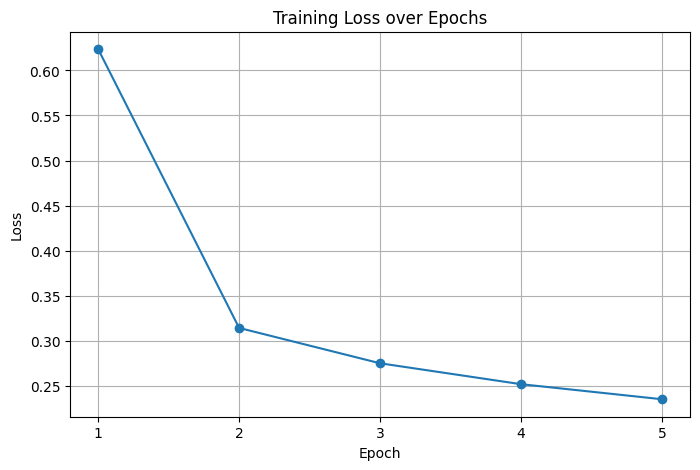

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.xticks(range(1, num_epochs + 1))
plt.grid(True)
plt.show()

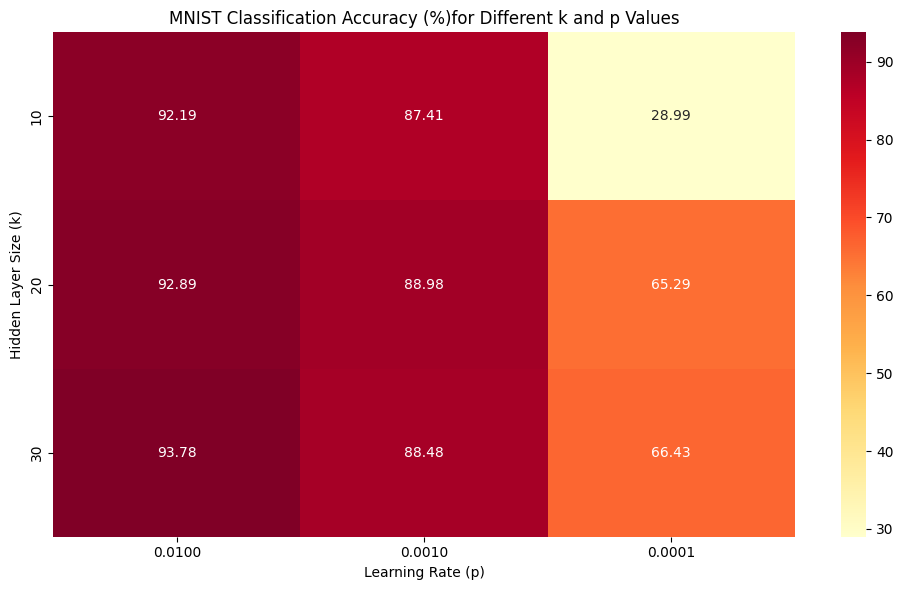

In [8]:
k_values = [10, 20, 30]
p_values = [0.01, 0.001, 0.0001]
accuracy_matrix = np.zeros((len(k_values), len(p_values)))

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        accuracy_matrix[i, j] = results[(k, p)]
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, 
            annot=True, 
            fmt='.2f',
            xticklabels=[f'{p:.4f}' for p in p_values],
            yticklabels=k_values,
            cmap='YlOrRd')

plt.xlabel('Learning Rate (p)')
plt.ylabel('Hidden Layer Size (k)')
plt.title('MNIST Classification Accuracy (%)\
for Different k and p Values')

plt.tight_layout()
plt.show()

In [9]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network class
class NeuralNet(nn.Module):
    def __init__(self, width, dropout_p):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, width)
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(width, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define hyperparameters
K = [1, 5, 15, 35]  # Width grid
P = [0.1, 0.25, 0.5, 1.0]  # Dropout grid
batch_size = 64
epochs = 80
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device being used:", device)
print("Initial setup complete")

Device being used: cpu
Initial setup complete


In [ ]:
# Function to train the model
def train_model(model, train_loader, optimizer, criterion):
    model.train()
    correct = 0
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = 100. * correct / len(train_loader.dataset)
    return total_loss / len(train_loader), accuracy

def test_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = 100. * correct / len(test_loader.dataset)
    return total_loss / len(test_loader), accuracy

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

results = {}

for p in P:
    for k in K:
        model = NeuralNet(width=k, dropout_p=p).to(device)
        optimizer = optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()
        train_losses, train_accuracies = [], []
        test_losses, test_accuracies = [], []
        for epoch in range(epochs):
            train_loss, train_accuracy = train_model(model, train_loader, optimizer, criterion)
            test_loss, test_accuracy = test_model(model, test_loader, criterion)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)
        results[(k, p)] = {
            'train_accuracy': train_accuracies,
            'test_accuracy': test_accuracies,
            'train_loss': train_losses,
            'test_loss': test_losses
        }

In [ ]:

def test_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = 100. * correct / len(test_loader.dataset)
    return total_loss / len(test_loader), accuracy


ValueError: x and y must have same first dimension, but have shapes (20,) and (80,)

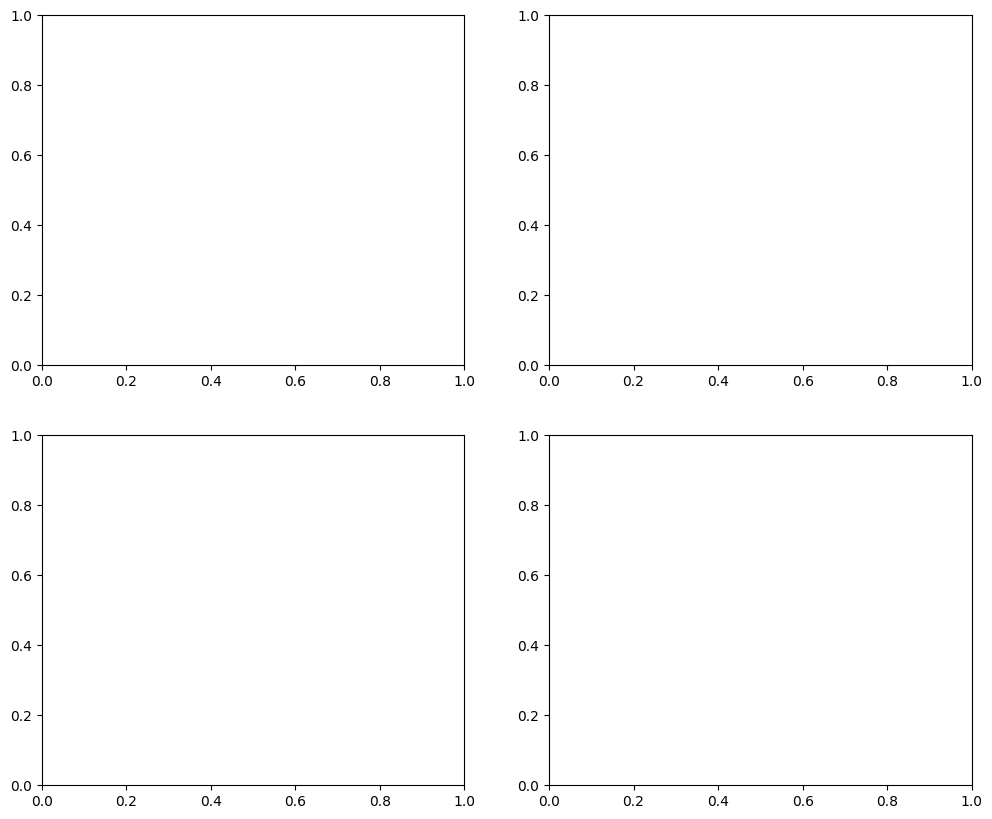

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, p in enumerate(P):
    ax = axes[i]
    for k in K:
        train_accuracies = results[(k, p)]['train_accuracy']
        test_accuracies = results[(k, p)]['test_accuracy']
        ax.plot(range(1, 21), train_accuracies, label=f'Train Width={k}')
        ax.plot(range(1, 21), test_accuracies, label=f'Test Width={k}', linestyle='--')
    ax.set_title(f'Dropout={p}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy (%)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()